```
         Copyright Rein Halbersma 2018-2020.
Distributed under the Boost Software License, Version 1.0.
   (See accompanying file LICENSE_1_0.txt or copy at
         http://www.boost.org/LICENSE_1_0.txt)
```

# Common Stratego Game Setups by Piece

## Re-implementing Dobby125's [blog post](http://stratego-tips.blogspot.com/2017/04/common-stratego-piece-placements.html)

In [1]:
import numpy as np

import gravon.package as pkg
from gravon.piece import Rank, rank_names, rank_counts
from gravon.setup import row_labels, col_labels
from gravon.heatmap import heatmap

df = pkg.load_dataset('ss2').query('ext == ".xml" & type == "classic"')
count, probs = df.setup_obj.apply(lambda x: x.tensor.astype(int)).agg(['sum', 'mean'])

The charts below show Stratego piece placements from 84,956 setups.

Common Stratego Marshal Placement



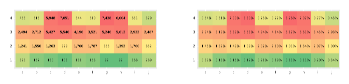

Common Stratego General Placement



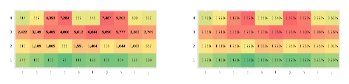

Common Stratego Colonel Placement



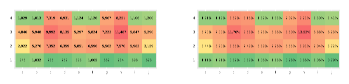

Common Stratego Major Placement



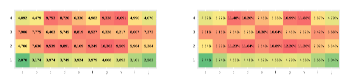

Common Stratego Captain Placement



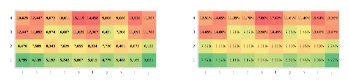

Common Stratego Lieutenant Placement



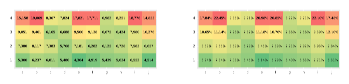

Common Stratego Sergeant Placement



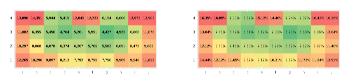

Common Stratego Miner Placement



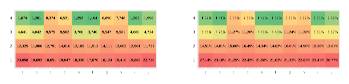

Common Stratego Scout Placement



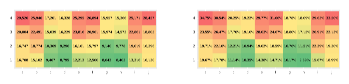

Common Stratego Spy Placement



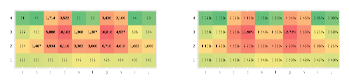

Common Stratego Bomb Placement



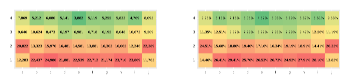

Common Stratego Flag Placement



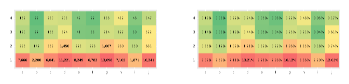

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(f'The charts below show Stratego piece placements from {df.shape[0]:,} setups.\n')
for r in list(reversed(range(Rank._1, Rank._B))) + [ Rank._B, Rank._F ]:
    print(f'Common Stratego {rank_names[r].capitalize()} Placement\n')
    plots = [ 
        heatmap(count[r], format_string='{:,}'), 
        heatmap(probs[r], format_string='{:7.2%}')
    ]
    for i, p in enumerate(plots):
        p.save(f'img{i}.png', dpi=1000)
    f, ax = plt.subplots(1, 2)
    for i in range(2):
        ax[i].imshow(mpimg.imread(f'img{i}.png'))
        ax[i].axis('off')
    plt.show()